In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import time
import sys
sys.path.append('../Proj_308427_348143_XXXXXX')

from Miniproject_1.model import Model

In [5]:
def normalize_dataset(dataset):
    for d in dataset:
        mean = d.mean([-1,-2])
        std  = d.std([-1,-2])
        norm = torchvision.transforms.Normalize(mean, std, inplace=True)
        norm(d)
    return dataset

In [6]:
# Load dataset or portion of it

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

valid_input, valid_target = torch.load('val_data.pkl',map_location=device)#validation set (noise-clean)
train_input, train_target = torch.load('train_data.pkl',map_location=device) #test set (noise-noise)

num_samples = 1000
valid_input=torch.narrow(valid_input,0,0,num_samples)
valid_target=torch.narrow(valid_target,0,0,num_samples)
train_input=torch.narrow(train_input,0,0,num_samples)
train_target=torch.narrow(train_target,0,0,num_samples)

train_in = normalize_dataset(train_input.float())
train_tg = normalize_dataset(train_target.float())
valid_in = normalize_dataset(valid_input.float())
valid_tg = normalize_dataset(valid_target.float())

print("Vector shape: ",train_input.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'val_data.pkl'

In [5]:
# Istantiate network
net = Model()

print('############################################')
print('############### Network test ###############')
print('############################################')
print('')
print('date & time: {0}'.format(time.strftime("%Y/%m/%d-%H:%M:%S")))


bella li
############################################
############### Network test ###############
############################################

date & time: 2022/05/07-12:48:18


In [5]:
# Train the network
num_epochs = 2
net.train_and_validate(train_in, train_tg, num_epochs, valid_in, valid_tg)
# out=net(train_in)
# print(out.shape)

# fig,ax=plt.subplots(1,1,figsize=(3,3))
# ax.imshow(out.permute[1,2,0],origin='upper')

Training on 2 epochs:
Epoch:	 Tr_Err:	  PSNR[dB]:
0	 0.984	  14.234
Epoch:	 Tr_Err:	  PSNR[dB]:
1	 0.878	  16.936


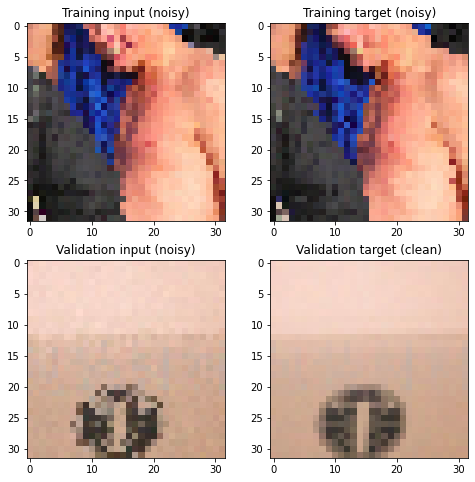

In [6]:
# # Visualize input and target

# fig,ax = plt.subplots(2,2, figsize=(8,8))
# select = 666

# ax[0,0].imshow(train_input[select].permute(1,2,0), origin='upper')
# ax[0,1].imshow(train_target[select].permute(1,2,0), origin='upper')
# ax[0,0].set_title("Training input (noisy)")
# ax[0,1].set_title("Training target (noisy)")


# ax[1,0].imshow(valid_input[select].permute(1,2,0), origin='upper')
# ax[1,1].imshow(valid_target[select].permute(1,2,0), origin='upper')
# ax[1,0].set_title("Validation input (noisy)")
# ax[1,1].set_title("Validation target (clean)");

In [ ]:
# def training_protocol(nb_epochs, model, criterion, train_input, train_target, val_input, val_target, batch_size):
#     #optimizer  = torch.optim.Adam(model.parameters(), lr=5e-4)
#     optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
    
#     print("Epoch:\t Tr_Err:\t  PSNR[dB]:")
#     for epoch in range(nb_epochs):
#         loss = traininig_step(model, criterion, optimizer, train_input, train_target, batch_size)
#         mse, psnr = validate(model, criterion, val_input, val_target, batch_size) 
#         scheduler.step(mse)
#         print("%d\t %.3f\t  %.3f"%(epoch, loss, psnr))
            

            

In [ ]:

# model, criterion = Model().to_device(), nn.MSELoss()

# batch_size = 500
# nb_epochs  = 10

In [ ]:
# start = time.time()
# training_protocol(nb_epochs, model, criterion, train_in, train_tg, \
#                   valid_input.float(), valid_target.float(), batch_size)
# end = time.time()
# print(end - start)

In [ ]:
# denoised = model(valid_input.float()).detach()
# denoised = denoised/denoised.max()
# ground_truth = valid_target.float()
# ground_truth = ground_truth/ground_truth.max()
# noisy = valid_input.float()
# noisy = noisy/noisy.max()

# mse = criterion(denoised, ground_truth).item()
# -10 * np.log10(mse + 10**-8)

In [ ]:
# fig,ax = plt.subplots(1,3, figsize=(15,12))
# select = 164

# ax[0].imshow(noisy[select].permute(1,2,0), origin='upper')
# ax[1].imshow(denoised[select].permute(1,2,0), origin='upper')
# ax[2].imshow(ground_truth[select].permute(1,2,0), origin='upper')

# ax[0].set_title("Validation input (noisy)")
# ax[1].set_title("Denoised input)")
# ax[2].set_title("Validation target (clean)");